In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('C:\\Users\\Navneet\\Documents\\Machine Learning Nov\\Datasets\\kc_house_data.csv', parse_dates=['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [63]:
from statsmodels.regression.linear_model import OLS #ordinary least square

In [64]:
df.drop('date', axis=1, inplace = True)

In [65]:
X = df.drop('price', axis = 1)
y = df['price']

In [66]:
import seaborn as sns

<AxesSubplot: >

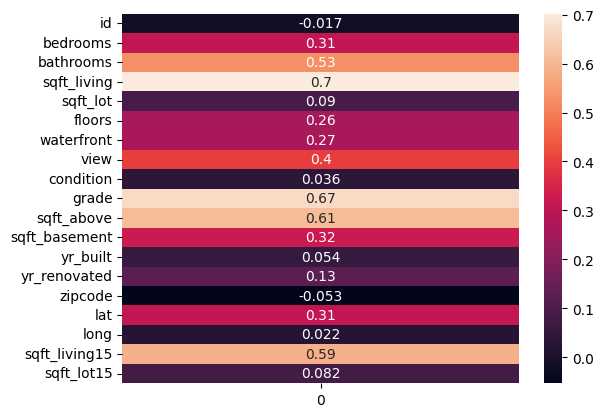

In [67]:
sns.heatmap(X.corrwith(y).to_frame(), annot=True)

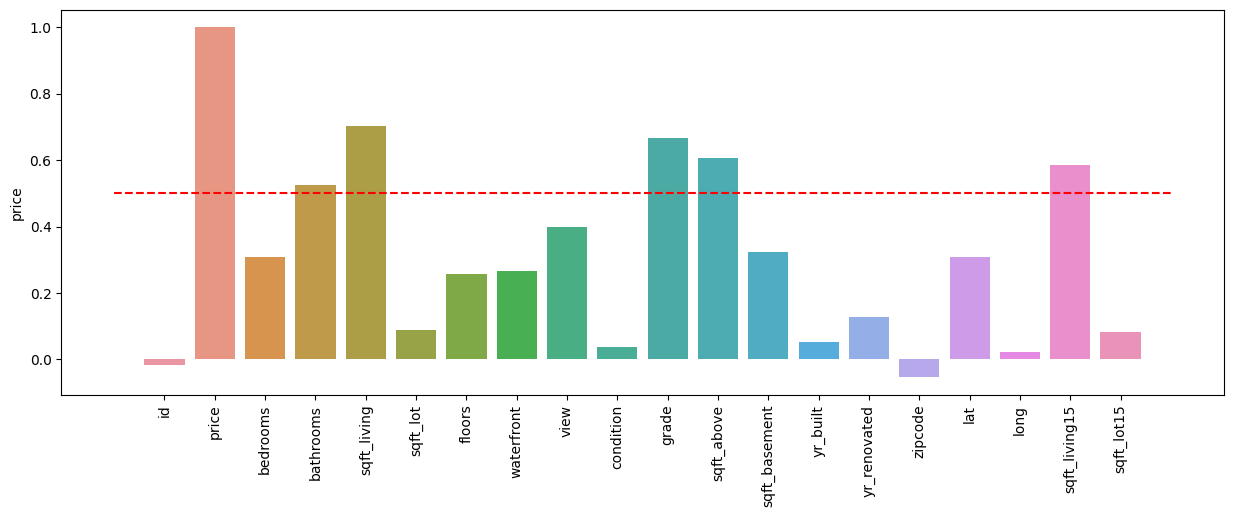

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(y = df.corr()['price'], x = df.corr().index)
plt.hlines(0.5, -1, 20, colors = 'red', linestyles='--')
plt.xticks(rotation=90)
plt.show()

In [69]:
X = np.append(np.ones((len(X), 1)), X, axis = 1)
X[0]

array([ 1.00000000e+00,  7.12930052e+09,  3.00000000e+00,  1.00000000e+00,
        1.18000000e+03,  5.65000000e+03,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.00000000e+00,  7.00000000e+00,  1.18000000e+03,
        0.00000000e+00,  1.95500000e+03,  0.00000000e+00,  9.81780000e+04,
        4.75112000e+01, -1.22257000e+02,  1.34000000e+03,  5.65000000e+03])

In [70]:
model = OLS(endog=y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:52:02   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e+06   2.93e+06      2.366      0.018    1.19e+06    1.27e+07
x1         -1.289e-06   4.82e-07     -2.671      0.008   -2.23e-06   -3.43e-07
x2         -3.576e+04   1891.574    -18.907      0.000   -3.95e+04   -3.21e+04
x3          4.116e+04   3253.218     12.651      0.000    3.48e+04    4.75e+04
x4           110.3978      2.269     48.647      0.000     105.950     114.846
x5             0.1218      0.048      2.539      0.011       0.028       0.216
x6          6764.7563   3595.459      1.881      0.060    -282.608    1.38e+04
x7          5.827e+05   1.74e+04     33.567      0.000    5.49e+05    6.17e+05
x8          5.303e+04   2140.594     24.774      0.000    4.88e+04    5.72e+04
x9          2.625e+04   2351.639     11.164      0.000    2.16e+04    3.09e+04
x10         9.601e+04   2152.926     44.594      0.000    9.18e+04       1e+05
x11           70.6894      2.253     31.369      0.000      66.272      75.106
x12           39.7060      2.646     15.005      0.000      34.519      44.893
x13        -2622.2522     72.653    -36.093      0.000   -2764.657   -2479.847
x14           19.6458      3.656      5.374      0.000      12.481      26.811
x15         -582.2481     32.981    -17.654      0.000    -646.894    -517.603
x16         6.024e+05   1.07e+04     56.115      0.000    5.81e+05    6.23e+05
x17        -2.128e+05   1.32e+04    -16.179      0.000   -2.39e+05   -1.87e+05
x18           21.6256      3.447      6.273      0.000      14.869      28.383
x19           -0.3964      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18406.018   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881616.153
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.149   Cond. No.                     1.36e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
Xo = X[0:, 8:19]

In [76]:
print(Xo.shape)
model = OLS(endog = y, exog = Xo)
results = model.fit()
results.summary()

(21613, 11)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          1.725e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:10:30   Log-Likelihood:                     -2.9541e+05
No. Observations:               21613   AIC:                                  5.908e+05
Df Residuals:                   21602   BIC:                                  5.909e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.384e+04   2029.955     41.299      0.000    7.99e+04    8.78e+04
x2          2.653e+04   2394.970     11.079      0.000    2.18e+04    3.12e+04
x3          1.022e+05   2181.731     46.838      0.000    9.79e+04    1.06e+05
x4           180.3676      3.148     57.290      0.000     174.197     186.539
x5           140.1505      3.696     37.918      0.000     132.906     147.395
x6         -2165.2074     63.267    -34.223      0.000   -2289.215   -2041.200
x7            34.8957      3.732      9.350      0.000      27.581      42.211
x8          -556.9844     17.949    -31.031      0.000    -592.167    -521.802
x9          6.155e+05    1.1e+04     55.770      0.000    5.94e+05    6.37e+05
x10        -2.363e+05   1.32e+04    -17.835      0.000   -2.62e+05    -2.1e+05
x11           15.3537      3.461      4.436      0.000       8.570      22.138
==============================================================================
Omnibus:                    19565.353   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2197801.051
Skew:                           3.932   Prob(JB):                         0.00
Kurtosis:                      51.772   Cond. No.                     9.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""